In [1]:
import gzip
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target'
]

In [3]:
input_file1 = 'kddcup.data_10_percent.gz'
output_file1 = 'kddcup2.csv'

with gzip.open(input_file1, 'rb') as f_in1, open(output_file1, 'wb') as f_out1:
    shutil.copyfileobj(f_in1, f_out1)

df = pd.read_csv(output_file1, header=None, names=cols)

In [4]:
df.shape

(494021, 42)

In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [6]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(contamination=0.05)
preds = isf.fit_predict(df.select_dtypes(exclude='object'))

dff = df[preds == 1]

dff.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
dff.shape

(469332, 42)

In [8]:
import pandas as pd

# Assuming your DataFrame is called df and your column is 'target'
dff['Status'] = dff['target'].apply(lambda x: 'normal' if x == 'normal.' else 'attacked')
dff.drop(['target'], axis=1, inplace=True)

<ipython-input-8-c9c43b34472b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Status'] = dff['target'].apply(lambda x: 'normal' if x == 'normal.' else 'attacked')
<ipython-input-8-c9c43b34472b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(['target'], axis=1, inplace=True)


In [9]:
dff.Status.value_counts()

attacked    384905
normal       84427
Name: Status, dtype: int64

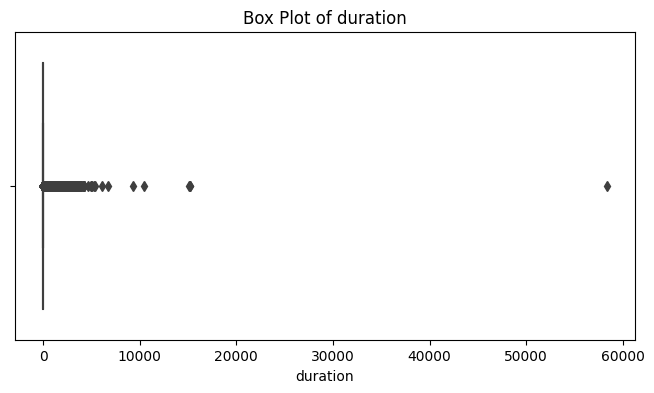

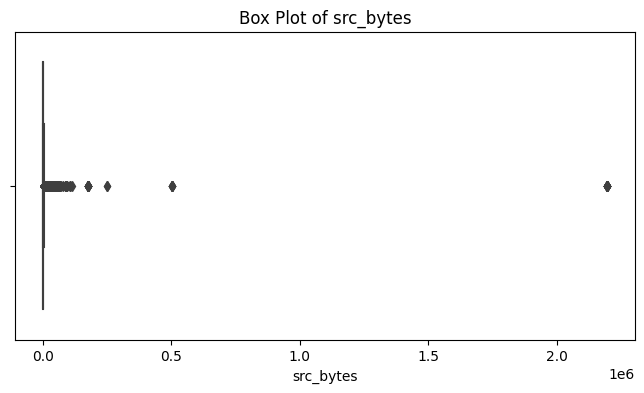

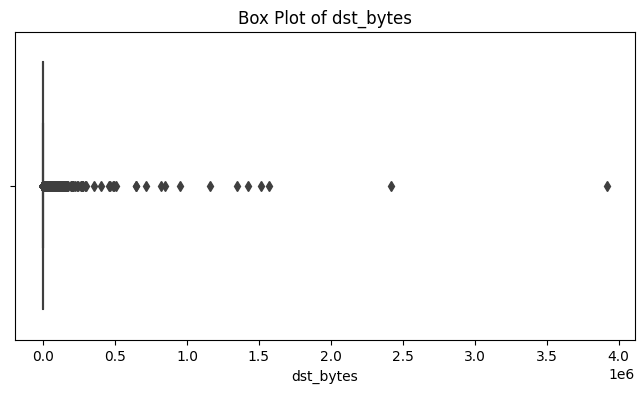

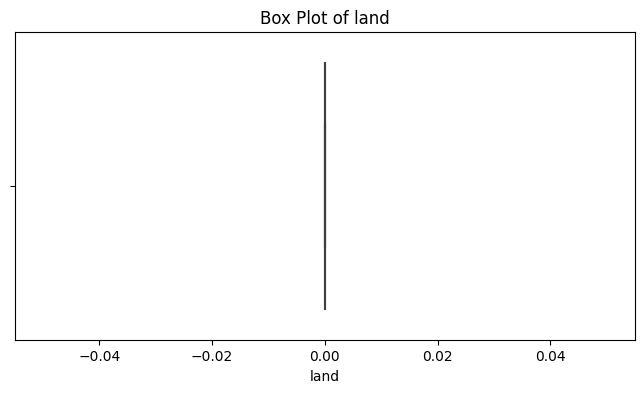

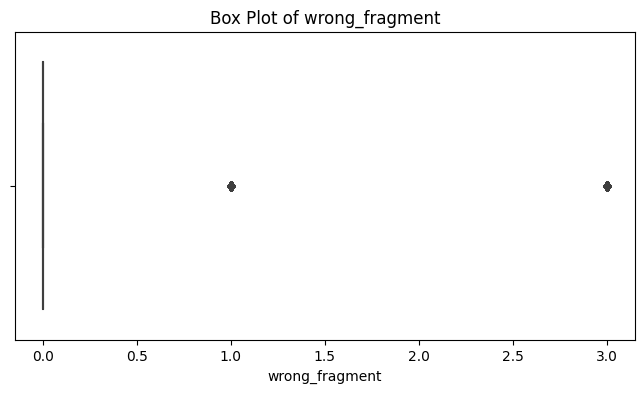

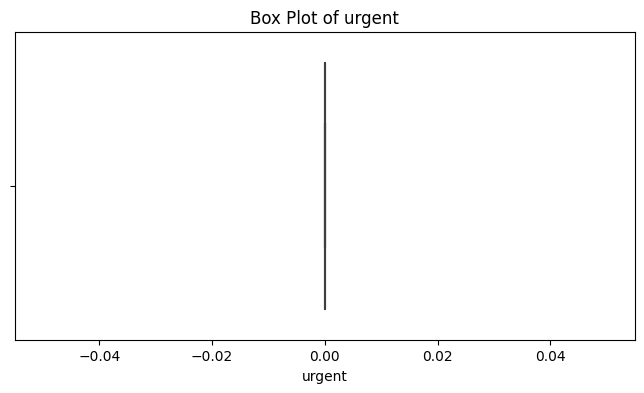

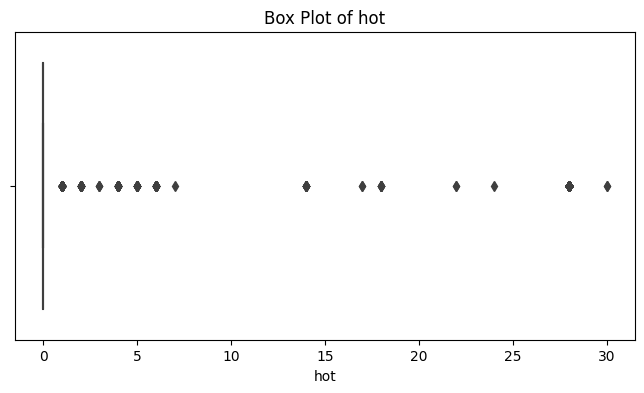

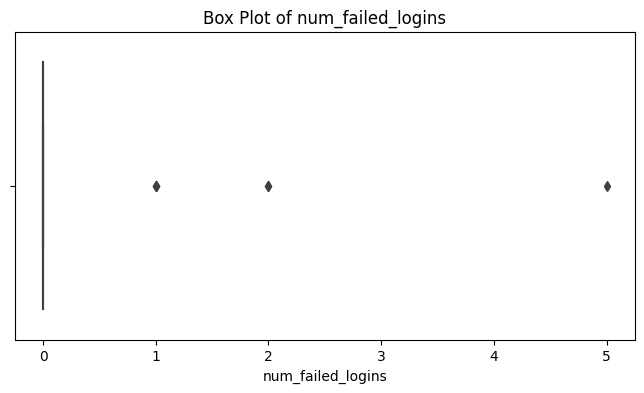

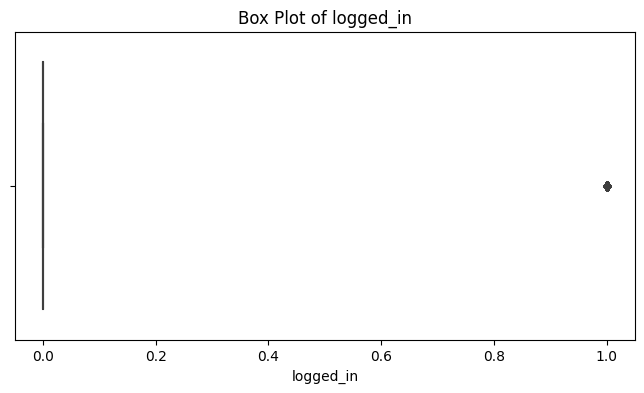

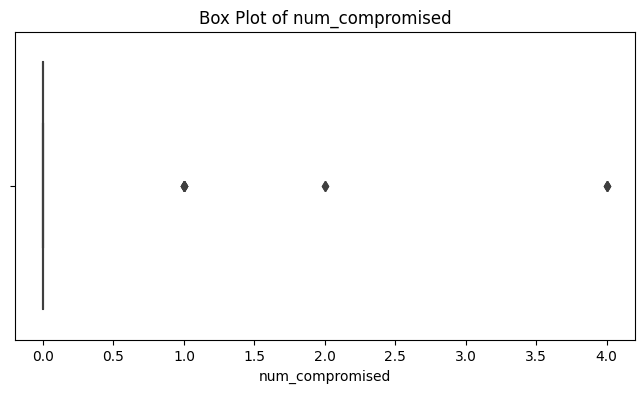

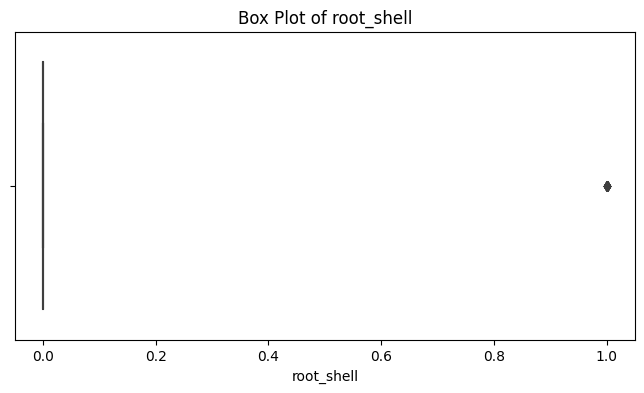

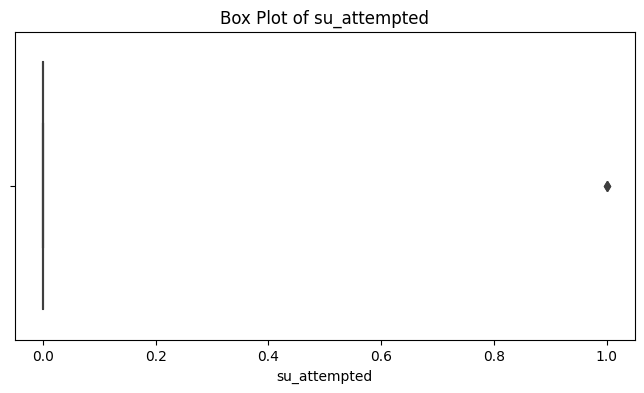

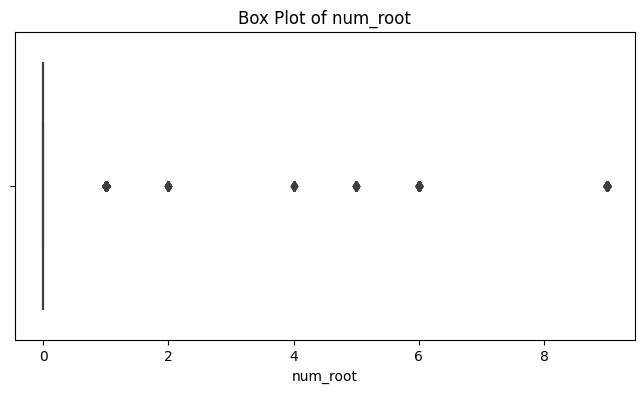

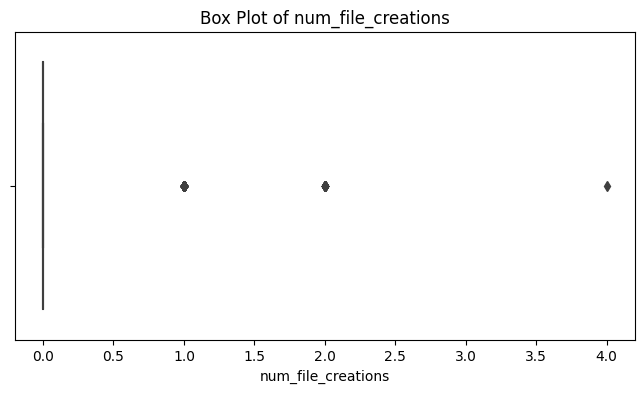

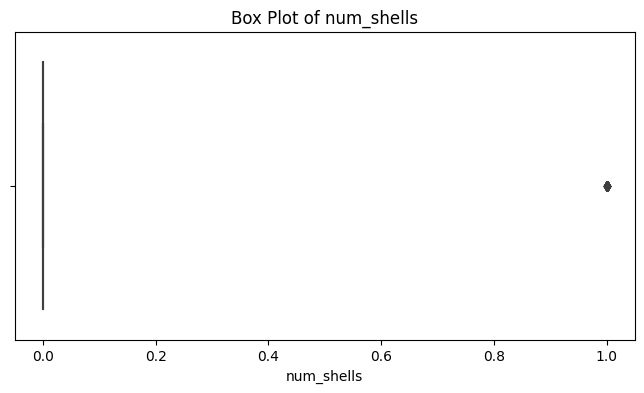

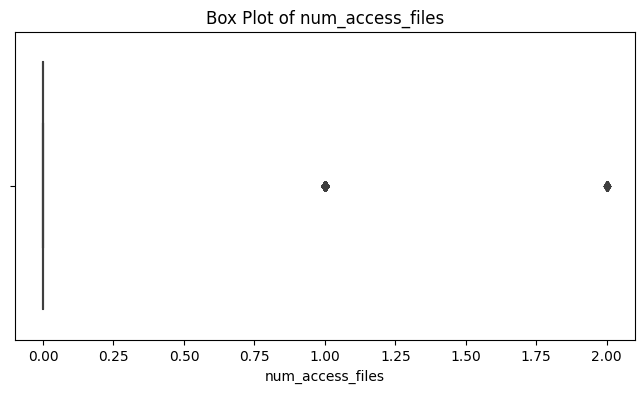

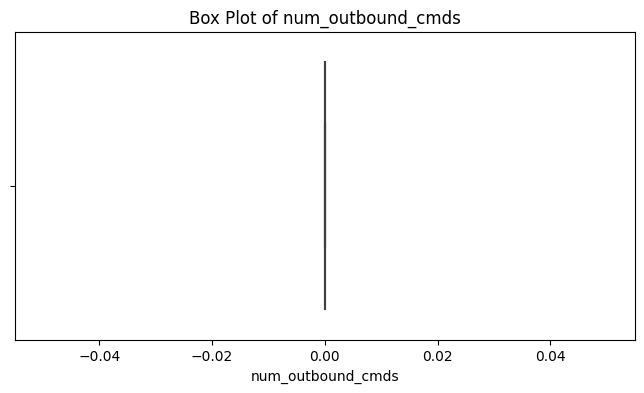

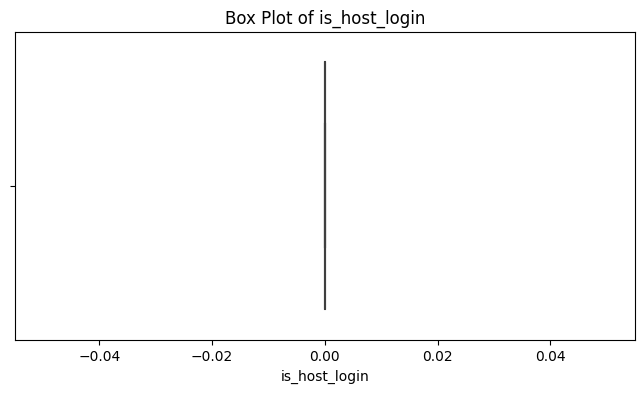

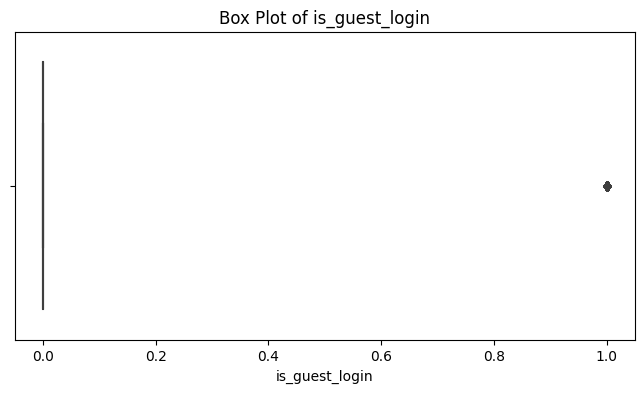

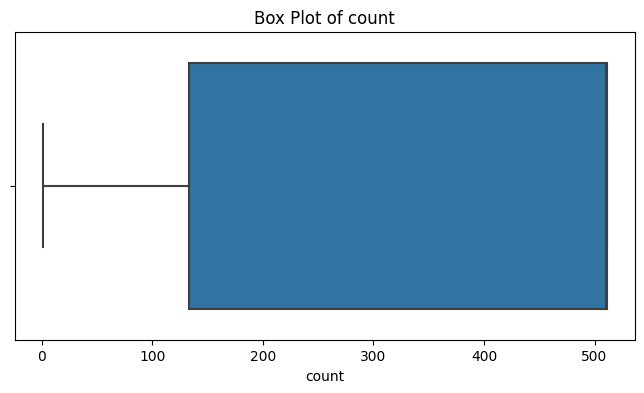

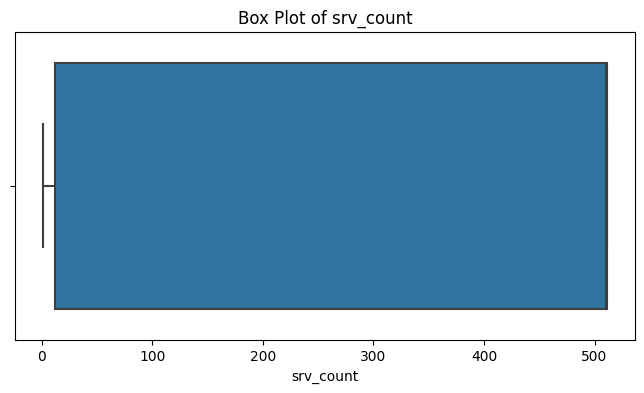

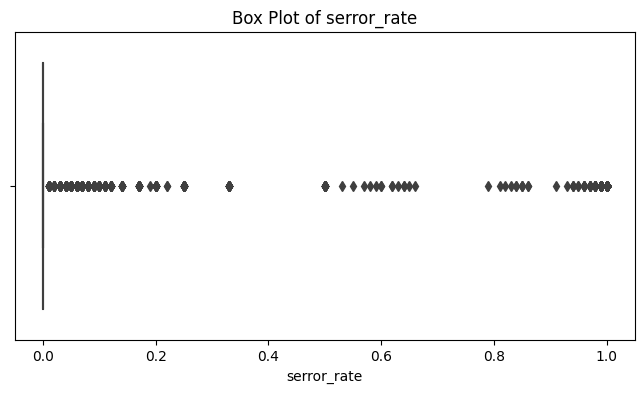

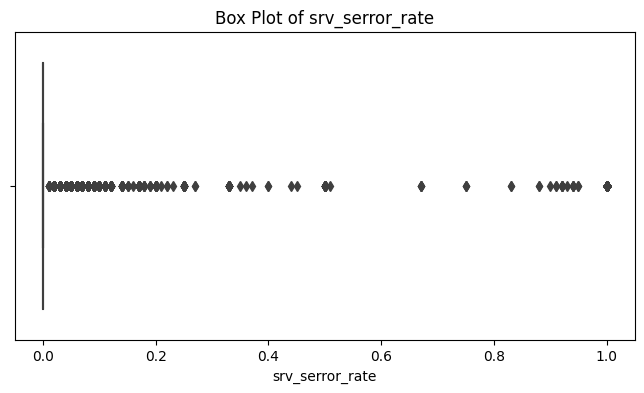

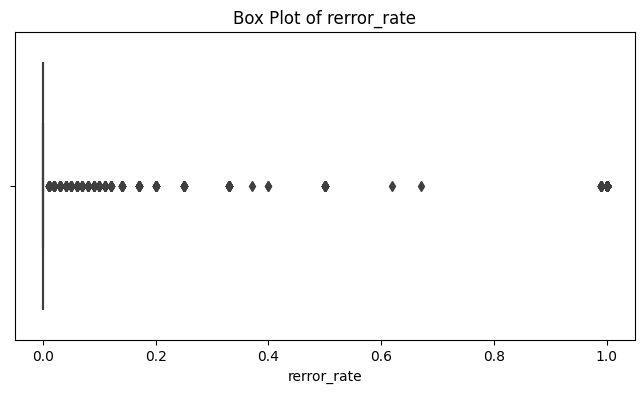

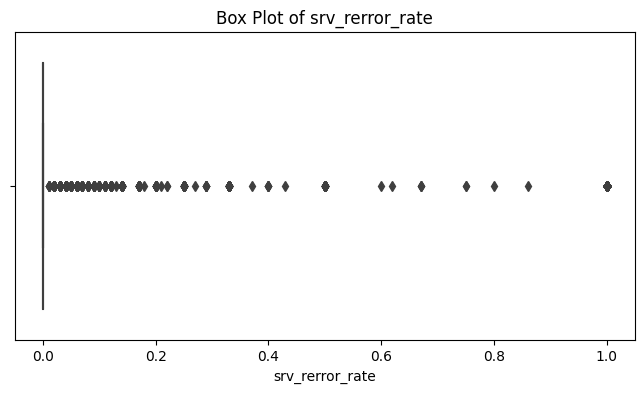

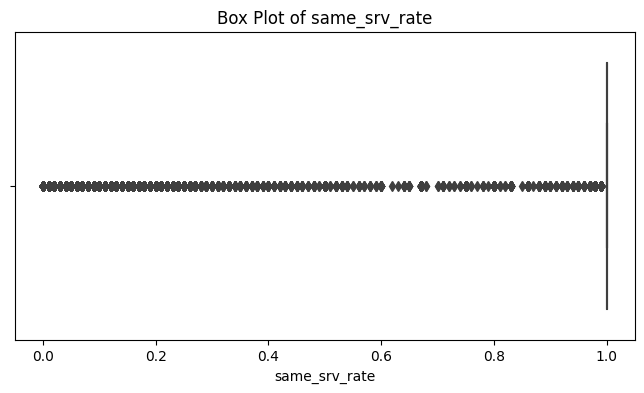

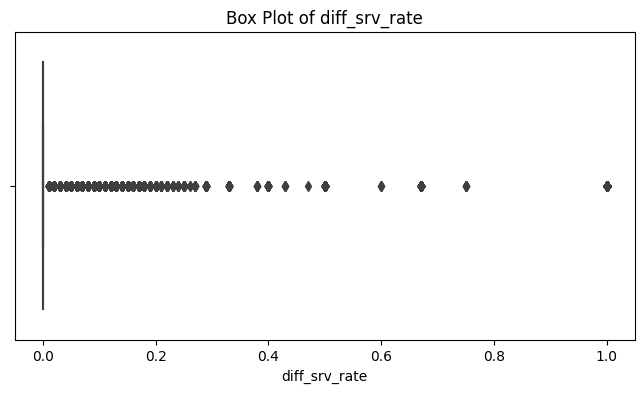

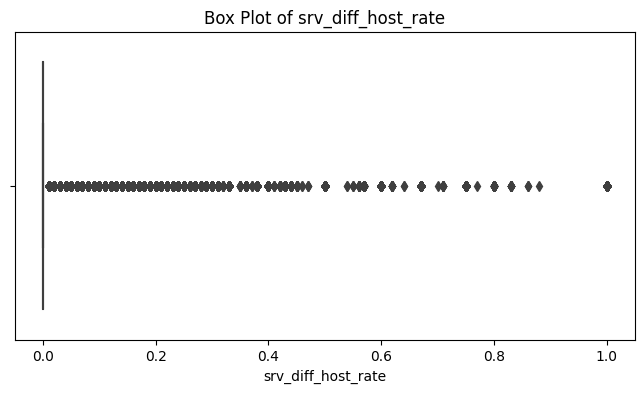

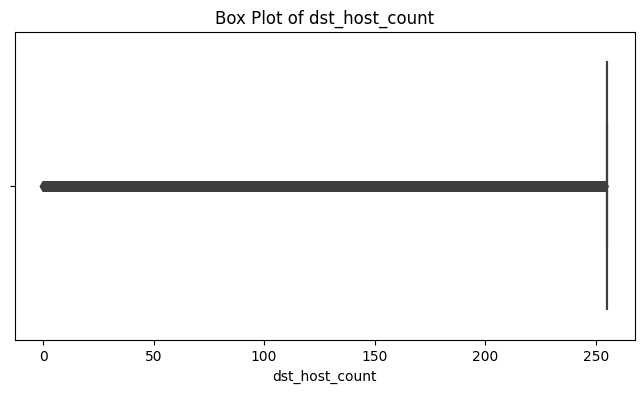

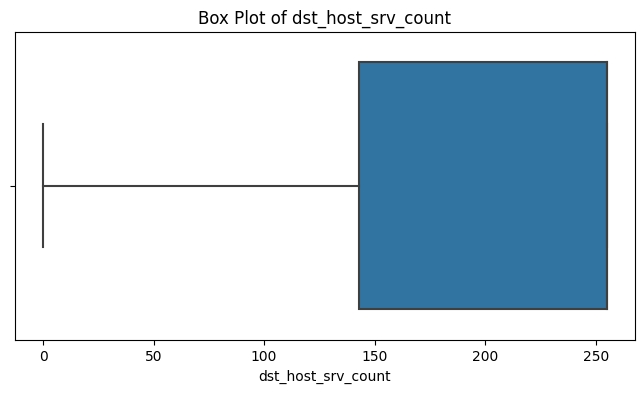

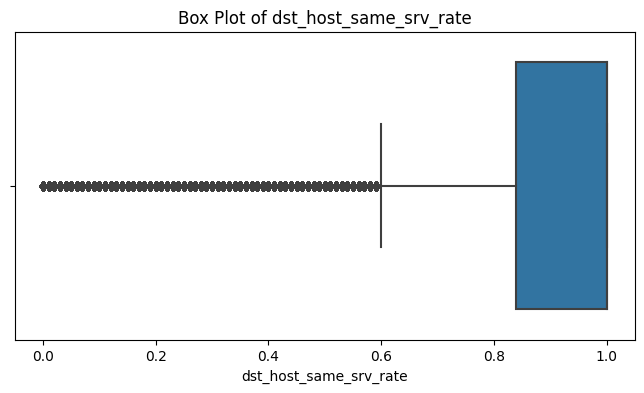

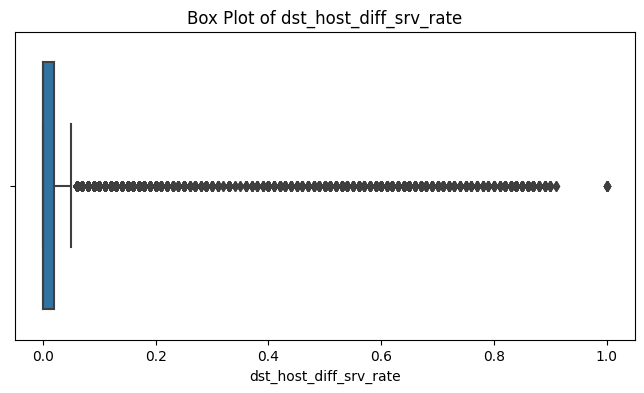

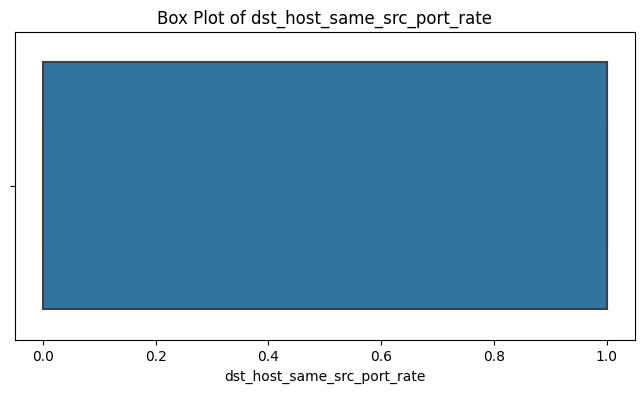

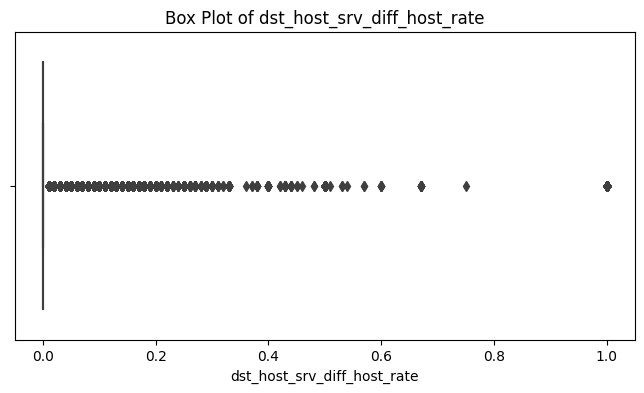

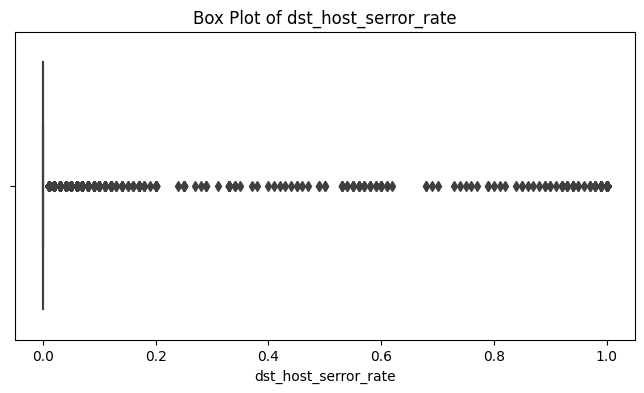

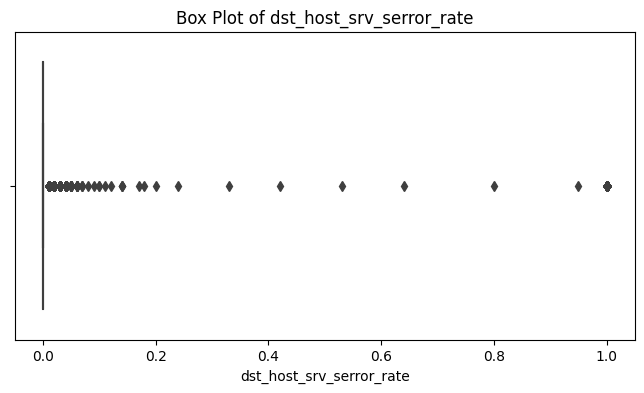

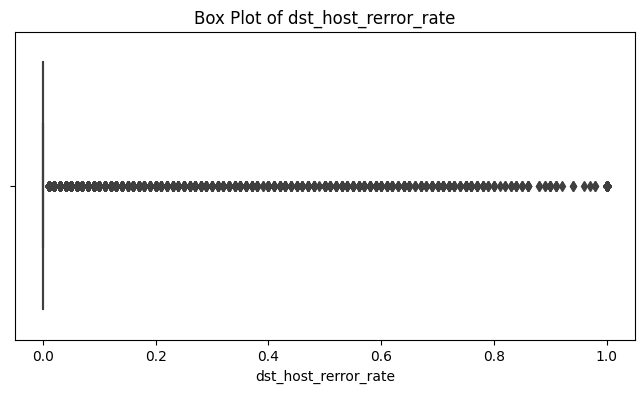

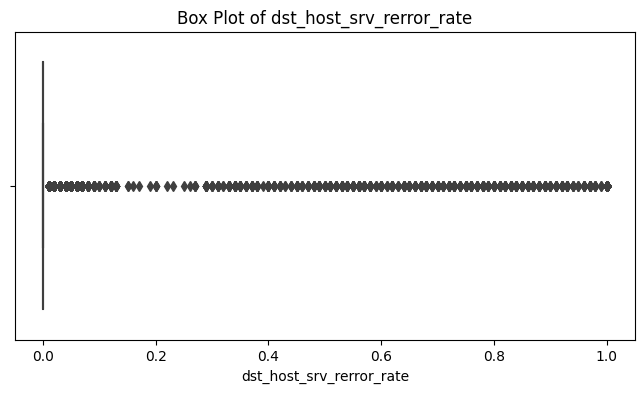

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = dff.select_dtypes(exclude='object')

for var in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dff[var])
    plt.xlabel(var)
    plt.title(f'Box Plot of {var}')
    plt.show()

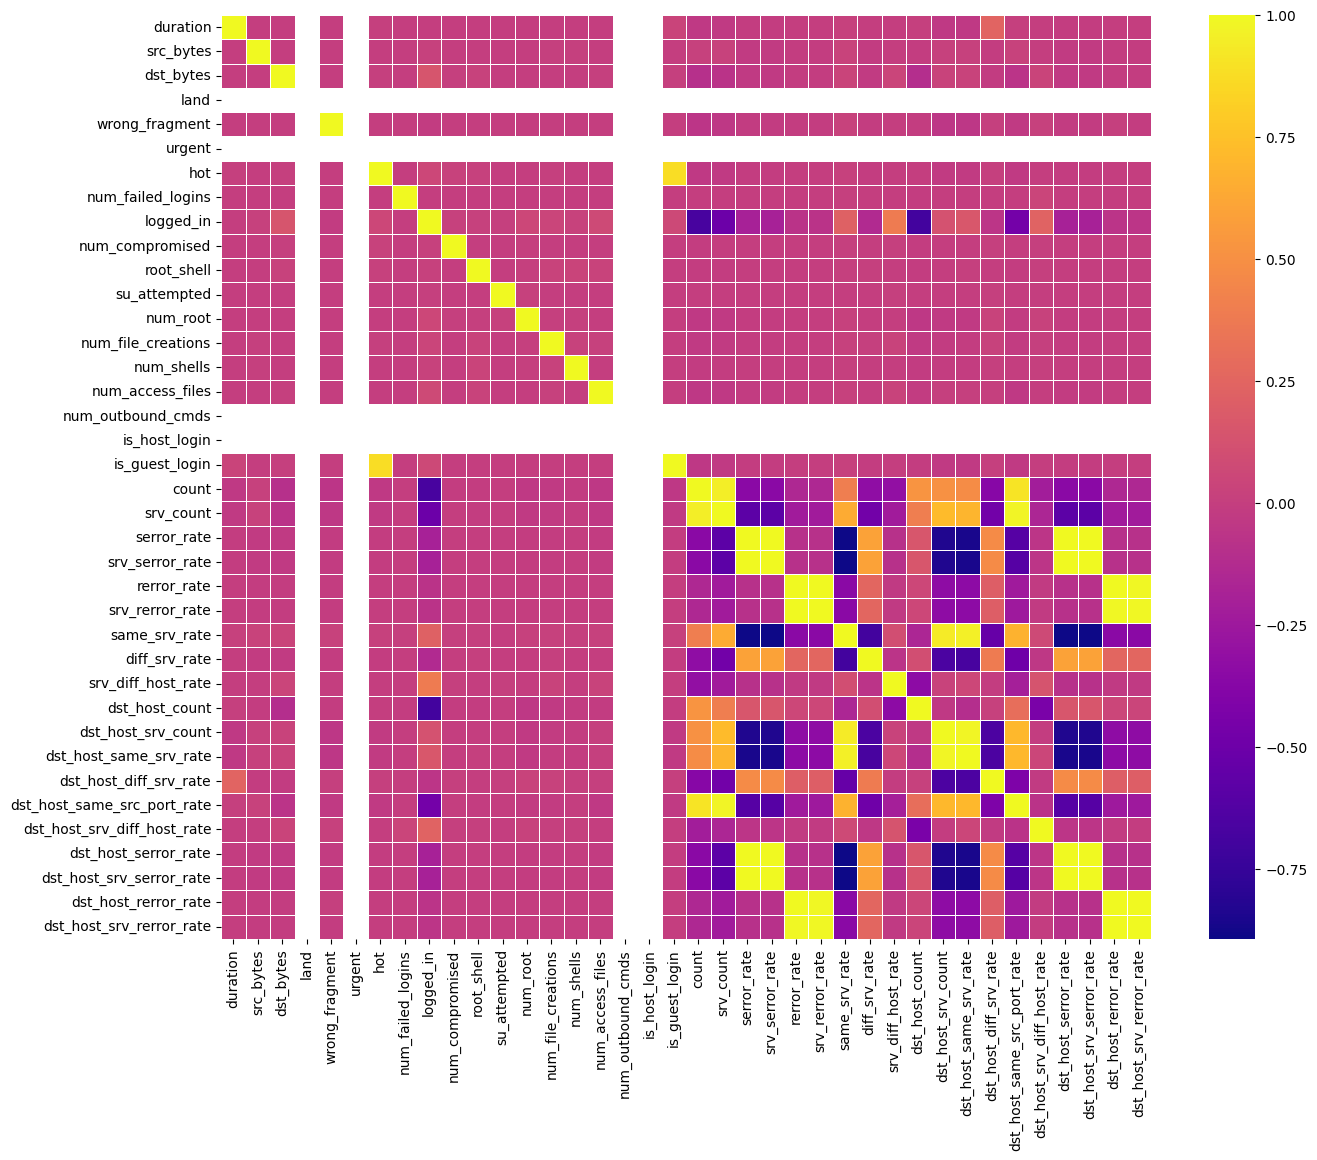

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns with more than one unique value
dff_filtered = dff.select_dtypes(include=['number'])  # Select numeric columns

# Calculate the correlation matrix
corr = dff_filtered.corr()

# Set up the figure size
plt.figure(figsize=(15, 12))

# Create a heatmap
sns.heatmap(corr, cmap="plasma", linewidths=0.4, annot=False)

# Show the heatmap
plt.show()

#file_path = 'heatmap.png'

# Save the heatmap as an image file
#plt.savefig(file_path)

In [12]:
data = dff[['dst_host_srv_rerror_rate', 'srv_rerror_rate',
            'dst_host_rerror_rate', 'rerror_rate',
            'dst_host_srv_serror_rate', 'srv_serror_rate',
            'dst_host_serror_rate', 'srv_serror_rate',
            'dst_host_same_src_port_rate', 'srv_count',
            'dst_host_srv_count', 'same_srv_rate',
            'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate',
            'dst_host_srv_serror_rate', 'dst_host_serror_rate',
            'srv_rerror_rate', 'rerror_rate',
            'srv_count', 'count',
            'srv_serror_rate', 'serror_rate',
            'num_root', 'num_compromised']].values

correlation_matrix = np.corrcoef(data, rowvar=False)

# Extract the correlations you need
correlation1 = correlation_matrix[0, 1]
correlation2 = correlation_matrix[2, 3]
correlation3 = correlation_matrix[4, 5]
correlation4 = correlation_matrix[6, 7]
correlation5 = correlation_matrix[8, 9]
correlation6 = correlation_matrix[10, 11]
correlation7 = correlation_matrix[12, 13]
correlation8 = correlation_matrix[14, 15]
correlation9 = correlation_matrix[16, 17]
correlation10 = correlation_matrix[18, 19]
correlation11 = correlation_matrix[20, 21]
correlation12 = correlation_matrix[22, 23]

In [13]:
# Define pairs of variables for correlation calculations
variable_pairs = [
    (0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11),
    (12, 13), (14, 15), (16, 17), (18, 19), (20, 21), (22, 23)
]

# Calculate correlations for each pair of variables and store in a list
correlations = [correlation_matrix[i, j] for i, j in variable_pairs]

# Print the correlations
for i, correlation in enumerate(correlations, 1):
    print(f"Correlation {i}: {correlation}")


Correlation 1: 0.9889305804978247
Correlation 2: 0.992930908732545
Correlation 3: 0.9997906908909855
Correlation 4: 0.9995998417913851
Correlation 5: 0.9726106722770494
Correlation 6: 0.9349372479931494
Correlation 7: -0.3387752003990101
Correlation 8: 0.999771509826103
Correlation 9: 0.9990118468759909
Correlation 10: 0.94874411990627
Correlation 11: 0.9998728958523777
Correlation 12: 0.007155245142959519


:As we can see that there are hight correlated varaiable,
so dropping all the  highly correlated variable

Reason:
The information is not new,
There are probablity of Confounding varaiable also.

In [14]:
columns_to_drop = [
    'num_root',
    'srv_serror_rate',
    'srv_rerror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'dst_host_same_srv_rate',
]

for column in columns_to_drop:
    dff.drop(column, axis=1, inplace=True)

dff.shape

<ipython-input-14-17371e4ddde8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(column, axis=1, inplace=True)
<ipython-input-14-17371e4ddde8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(column, axis=1, inplace=True)
<ipython-input-14-17371e4ddde8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(column, axis=1, inplace=True)
<ipython-input-14-17371e4ddde8>:13: SettingWithCopyWarning: 
A value is tryi

(469332, 34)

In [15]:
from sklearn.model_selection import train_test_split
df1 = dff

x_train,x_test,y_train,y_test = train_test_split(df1.drop(['Status'], axis=1), df1['Status'], test_size=0.6, random_state=35)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.3, random_state=42)

In [16]:
#numerical Columns
numerical_cols =x_train.select_dtypes(exclude=['object']).columns

#Categorical Columns
categorical_cols=x_train.select_dtypes(include=['object']).columns
#categorical_cols = categorical_cols[:-1]

print(numerical_cols)
print(categorical_cols)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')
Index(['protocol_type', 'service', 'flag'], dtype='object')


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the column transformer with PCA
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ('scalar', StandardScaler(), numerical_cols)
        #('pca', PCA(n_components=25), numerical_cols)  # Add PCA here with the desired number of components
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and test data
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)
x_val = ct.transform(x_val)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(187732, 104)
(84480, 104)
(197120, 104)


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
x_val, y_val = smote.fit_resample(x_val, y_val)

print(x_train.shape)
print(x_val.shape)

(308324, 104)
(322928, 104)


In [20]:
y_train.value_counts()

normal      154162
attacked    154162
Name: Status, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [26]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 6.0 MB/s eta 0:00:00


In [27]:
import keras_tuner as kt
from tensorflow import keras

Using TensorFlow backend


In [30]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=224),
                                 activation=hp.Choice('activation_1', values=['relu', 'tanh', 'softmax', 'sigmoid']),
                                 input_shape=(104,),
                    kernel_regularizer=l2(hp.Float('l2_1', min_value=0.005, max_value=0.5)) ))

    # Tune the number of layers and nodes
    for i in range(hp.Int('num_of_layers', min_value=2, max_value=10)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=32, max_value=224),
                                     activation=hp.Choice(f'activation_{i+2}', values=['relu', 'tanh','softmax', 'sigmoid']),
                        kernel_regularizer=l2(hp.Float(f'l2_{i+2}', min_value=0.005, max_value=0.5)) ))

    # Add BatchNormalization and Dropout with choices
        if hp.Choice(f'use_batchnorm_{i+2}', values=[True, False]):
            model.add(BatchNormalization())
        if hp.Choice(f'use_dropout_{i+2}', values=[True, False]):
            model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.1, max_value=0.8)))


    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Tune the optimizer choice and learning rate
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'adadelta'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Perform hyperparameter tuning
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=2)

tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

Trial 17 Complete [00h 04m 24s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.9965038895606995
Total elapsed time: 01h 09m 44s


In [31]:
print("Best Model:")
best_model.summary()

print("\nBest Hyperparameters:")
for key, value in best_hyperparameters.values.items():
    print(f"{key}: {value}")

Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 151)               15855     
                                                                 
 dense_1 (Dense)             (None, 51)                7752      
                                                                 
 batch_normalization (Batch  (None, 51)                204       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 53)                2756      
                                                                 
 batch_normalization_1 (Bat  (None, 53)                212       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 162)    

In [32]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

final_result = best_model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/3
9636/9636 [==============================] - 82s 8ms/step - loss: 0.0933 - accuracy: 0.9952 - val_loss: 0.2211 - val_accuracy: 0.9773
Epoch 2/3
9636/9636 [==============================] - 72s 8ms/step - loss: 0.1760 - accuracy: 0.9960 - val_loss: 0.2070 - val_accuracy: 0.9971
Epoch 3/3
9636/9636 [==============================] - 76s 8ms/step - loss: 0.0812 - accuracy: 0.9960 - val_loss: 1.6347 - val_accuracy: 0.8206


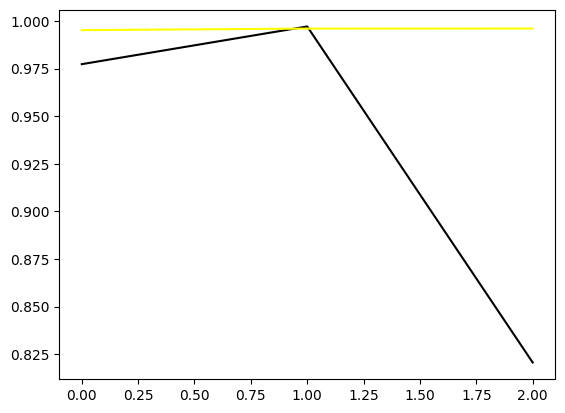

In [33]:
import matplotlib.pyplot as plt

plt.plot(final_result.history['val_accuracy'], color='black')
plt.plot(final_result.history['accuracy'], color='yellow')

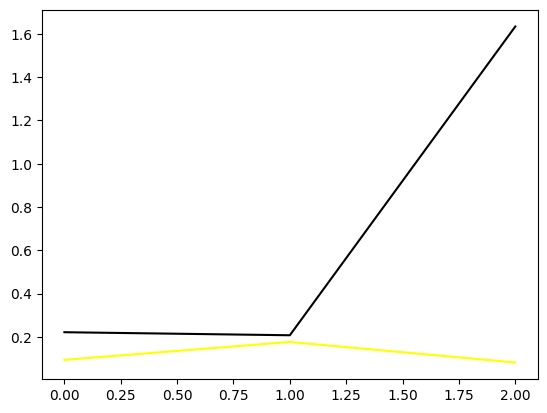

In [34]:
plt.plot(final_result.history['val_loss'], color='black')
plt.plot(final_result.history['loss'], color='yellow')

In [35]:
# Predict on test data
y_pred = best_model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
score = accuracy_score(y_test, y_pred_classes)
cr = classification_report(y_test, y_pred_classes)

print("FINAL MODEL 'ANN'")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

2640/2640 [==============================] - 6s 2ms/step
FINAL MODEL 'ANN'
Accuracy Score value: 0.9971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69279
           1       0.98      1.00      0.99     15201

    accuracy                           1.00     84480
   macro avg       0.99      1.00      1.00     84480
weighted avg       1.00      1.00      1.00     84480



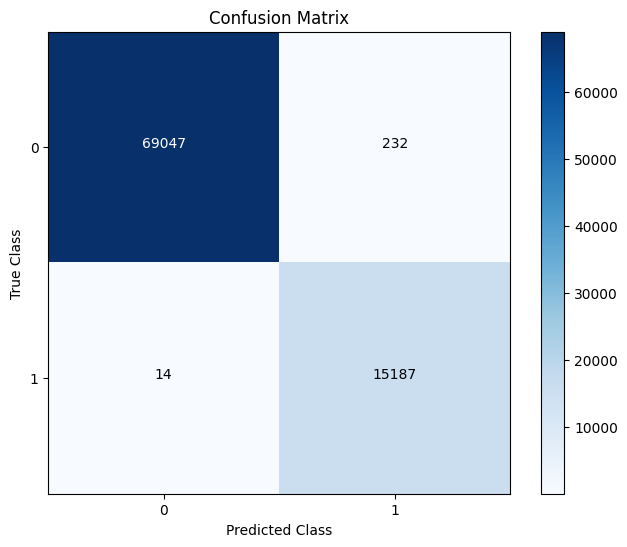

In [36]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define class labels
class_labels = np.unique(y_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add labels to each cell
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [37]:
best_model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
import os
os.listdir()

['.config',
 'kddcup.data_10_percent.gz',
 'kddcup2.csv',
 'best_model.h5',
 '.ipynb_checkpoints',
 'untitled_project',
 'sample_data']